# Random Forrest

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

np.random.seed(0)

### Random Forrest
### Logistic Regression
### Support Vector Machine
### K-Nearestneighbors
### K-Means Clustering
### Decision Tree

## Creating iris data

In [17]:
iris = load_iris()

# Creating a dataframewith the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df1 = pd.read_csv('C:\\Users\\sm\\Documents\\Data science\\Examples\\kaggle\\Iris data\\iris.data')
df2 = pd.read_csv('C:\\Users\\sm\\Documents\\Data science\\Examples\\kaggle\\Iris data\\bezdekIris.data')
df2.columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','species']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Random Forrest

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = df["species"]
X = df.drop(["species"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.20)


model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, predictions))


1.0


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=200)
reg.fit(X_train,y_train)
pred1 = model.predict(X_test)

score = reg.score(X_test, y_test)
score

1.0

In [99]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, pred1))

1.0


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, pred1)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

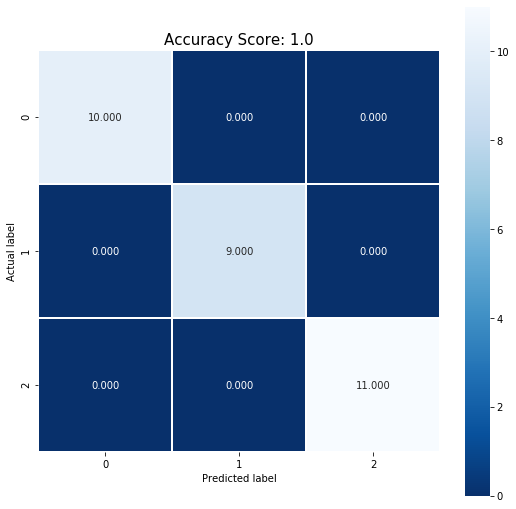

In [37]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [40]:
print((pred1 == y_test).shape)

(30,)


In [50]:
y_test.value_counts()

virginica     11
setosa        10
versicolor     9
Name: species, dtype: int64

## Support Vector Machine

In [103]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
pred2 = clf.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, pred2))


1.0


## K-Nearestneighbors

In [107]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

## Fit model
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

1.0


### Can we locate an even better value for K? 

In [109]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    


Text(0, 0.5, 'Testing Accuracy')

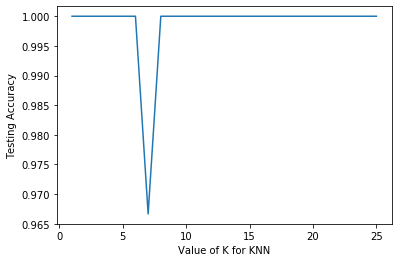

In [110]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## K-Means Clustering

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y1 = le.fit_transform(y)

y1_train, y1_test = train_test_split(y1, random_state=42, test_size=.20)

y1_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [94]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(X_train)
identified_clusters = kmeans.fit_predict(X_test)
identified_clusters

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 1])

## Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state= 100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

y_pred = clf_entropy.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, pred2))

1.0
